# Example – modeling the strength of concrete with regression trees

In [2]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm

# Step 1 – collecting data

In [4]:
#For this analysis, we will utilize data on the compressive strength of concrete donated to the UCI 
#http://archive.ics.uci.edu/ml
df = pd.read_csv('10 concrete.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Step 2 – exploring and preparing the data

In [5]:
#The concrete data includes 8 features and the strength outcome, as follows
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


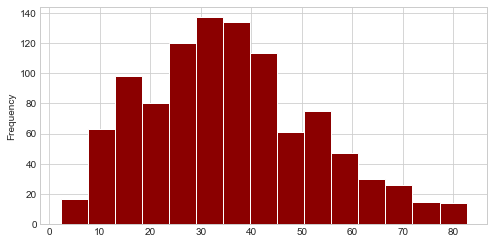

In [6]:
df['strength'].plot.hist(bins=15,color='darkred',edgecolor='white',figsize=(8,4))

# Step 3 – training a model on the data

In [8]:
x_train = df.drop('strength',axis = 1)
y_train = df['strength']
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# Step 4 – evaluating model performance

In [13]:
y_pred = dtree.predict(x_train)
temp = pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_pred)],axis=1)
temp.columns = ['actual','predicted']
temp.corr()
#The corr() function is used to obtain a correlation between two numeric vectors.
#Correlations close to 1 indicate strong linear relationships between two variables.
#Therefore, the correlation here of about 0.998 indicates a very strong relationship. 

,actual,predicted
actual,1.000000,0.998025
predicted,0.998025,1.000000


In [14]:
print('MAE:', sm.tools.eval_measures.meanabs(y_train, y_pred, axis=0))
print('MSE:', sm.tools.eval_measures.mse(y_train, y_pred, axis=0))
print ('RMSE:', sm.tools.eval_measures.rmse(y_train, y_pred, axis=0))

MAE: 0.108673139159
MSE: 1.10032003236
RMSE: 1.04896140652
